# Importing libraries

In [19]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [20]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# Define the path for the data file

iris = "E:\\VisualProyects\\TS007S\\TC1002S\\NotebooksStudents\\A01642529\\Iris.csv"


# Importing data

In [21]:
# Define the col names for the iris dataset
colnames = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


# Load the dataset from HHDD
irisData = pd.read_csv(iris, header = None, names = colnames )

# Show the data (first 5 rows)
irisData.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [22]:
# Display basic information about the dataset
irisData.info()

# Display basic statistics of the dataset
irisData.describe()

# Display the first few rows of the dataset
irisData.head()

# Display the last few rows of the dataset
irisData.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Id to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SepalLengthCm  151 non-null    object
 1   SepalWidthCm   151 non-null    object
 2   PetalLengthCm  151 non-null    object
 3   PetalWidthCm   151 non-null    object
 4   Species        151 non-null    object
dtypes: object(5)
memory usage: 7.1+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


2. Drop rows with any missing values


In [23]:
# Drop rows with any missing values
irisData.dropna()

# Display the updated DataFrame
irisData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Id to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SepalLengthCm  151 non-null    object
 1   SepalWidthCm   151 non-null    object
 2   PetalLengthCm  151 non-null    object
 3   PetalWidthCm   151 non-null    object
 4   Species        151 non-null    object
dtypes: object(5)
memory usage: 7.1+ KB


3. Encoding the class label categorical column: from string to num


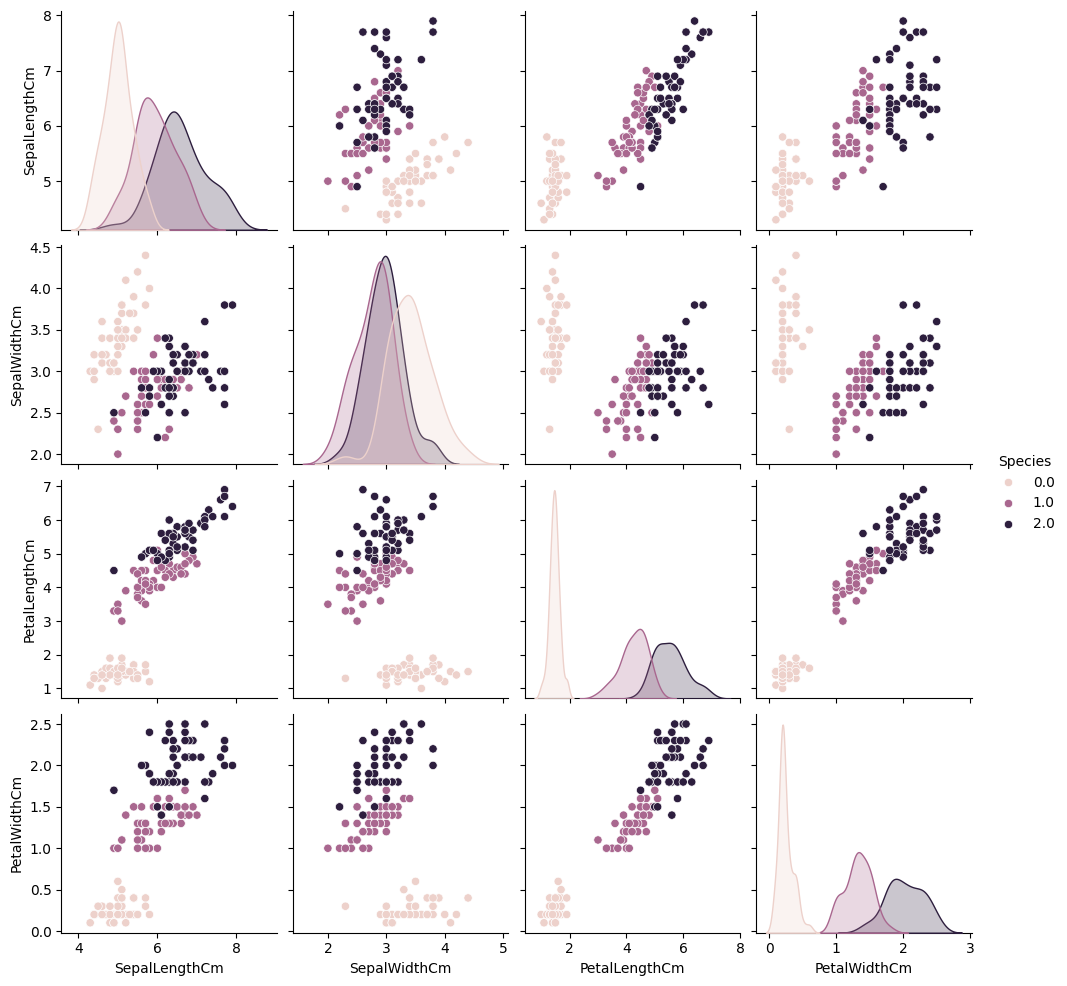

In [24]:
# Convert object columns to numeric
irisData['SepalLengthCm'] = pd.to_numeric(irisData['SepalLengthCm'], errors='coerce')
irisData['SepalWidthCm'] = pd.to_numeric(irisData['SepalWidthCm'], errors='coerce')
irisData['PetalLengthCm'] = pd.to_numeric(irisData['PetalLengthCm'], errors='coerce')
irisData['PetalWidthCm'] = pd.to_numeric(irisData['PetalWidthCm'], errors='coerce')

# Map the species column to numeric values
irisData['Species'] = irisData['Species'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

# Visualize the dataset
sns.pairplot(irisData, hue="Species")



Now the label/category is numeric


4. Discard columns that won't be used


In [37]:
# If necesary, drop out non necesary columns
irisData = irisData.drop(columns=['SepalLengthCm', 'SepalWidthCm'])

5. Scatter plot of the data

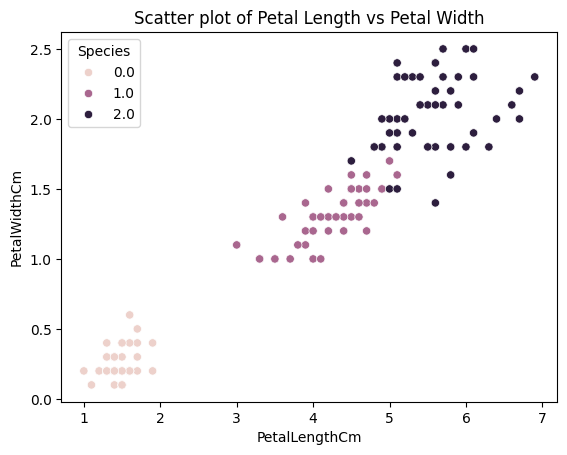

In [38]:
# Scatter plot of PetalLengthCm vs PetalWidthCm, colored by Species
sns.scatterplot(data=irisData, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title('Scatter plot of Petal Length vs Petal Width')
plt.show()

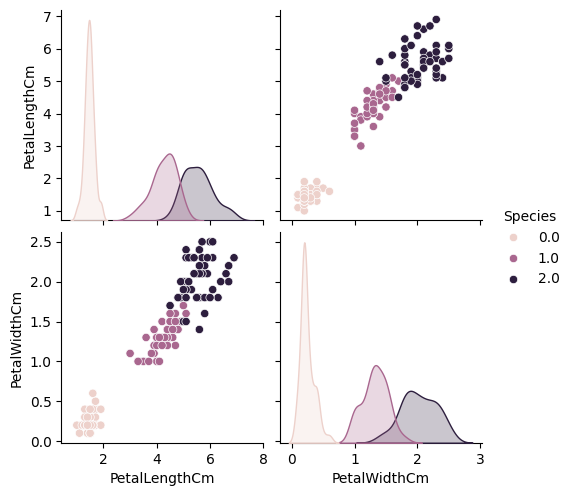

In [39]:
# Pairplot: Scatterplot of all variables
sns.pairplot(irisData, hue="Species")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [41]:
# Get dataframes for each real cluster
cluster_0 = irisData[irisData['Species'] == 0]
cluster_1 = irisData[irisData['Species'] == 1]
cluster_2 = irisData[irisData['Species'] == 2]


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [47]:
# Import scikit-learn KMeans (doesnt work with sklearn)
from sklearn.cluster import KMeans

# Drop rows with any missing values what i did before idk why i need to do it again!
irisData_clean = irisData.dropna()

# Define number of clusters (K) 
k = 3

# Do K-means clustering (assign each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=k, random_state=0).fit(irisData_clean)





In [48]:
# Print estimated cluster of each point in the dataset
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [51]:
# Manual pairing the labels of the real and estimated clusters
# Assuming the clusters are ordered as [0, 1, 2] for real labels and [1, 0, 2] for estimated labels
label_mapping = {0: 1, 1: 0, 2: 2}

# Apply the mapping to the estimated labels
irisData_clean.loc[:, 'EstimatedCluster'] = kmeans.labels_
irisData_clean.loc[:, 'EstimatedCluster'] = irisData_clean['EstimatedCluster'].map(label_mapping)

# Display the updated DataFrame
irisData_clean.head()

,PetalLengthCm,PetalWidthCm,Species,EstimatedCluster
1,1.4,0.2,0.0,0
2,1.4,0.2,0.0,0
3,1.3,0.2,0.0,0
4,1.5,0.2,0.0,0
5,1.4,0.2,0.0,0


In [53]:
# Add a new column to the dataset with the cluster information
irisData['EstimatedCluster'] = irisData_clean['EstimatedCluster']

In [54]:
# Label of the estimated clusters
cluster_0_est = irisData[irisData['EstimatedCluster'] == 0]
cluster_1_est = irisData[irisData['EstimatedCluster'] == 1]
cluster_2_est = irisData[irisData['EstimatedCluster'] == 2]



In [55]:
# Cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster centroids:\n", centroids)

Cluster centroids:
 [[4.26470588 1.33333333 1.01960784]
 [1.464      0.244      0.        ]
 [5.57346939 2.03265306 2.        ]]


In [56]:
# Sum of squared error (sse) of the final model

sse = kmeans.inertia_
print("Sum of squared error (sse) of the final model:", sse)

Sum of squared error (sse) of the final model: 33.33186138455382


In [57]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print("Number of iterations:", iterations)



Number of iterations: 3


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

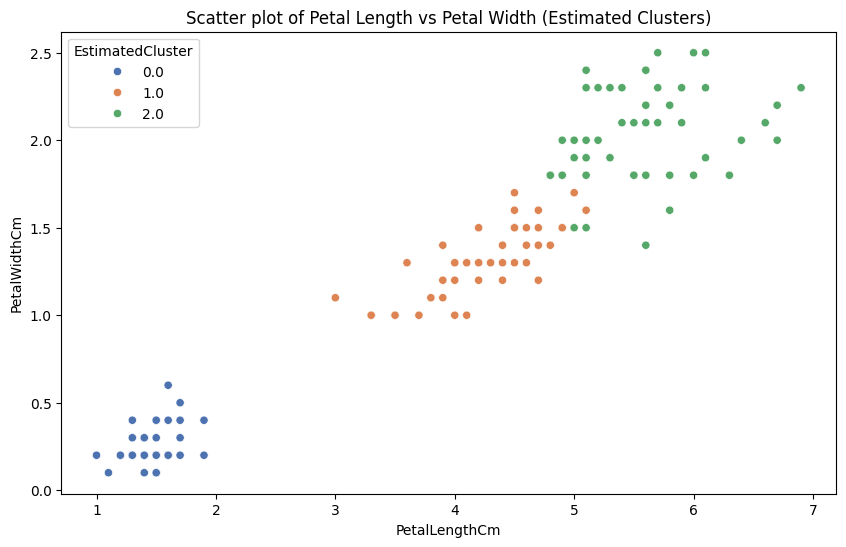

In [58]:
# Plot estimated clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=irisData, x='PetalLengthCm', y='PetalWidthCm', hue='EstimatedCluster', palette='deep')
plt.title('Scatter plot of Petal Length vs Petal Width (Estimated Clusters)')
plt.show()

## Plot both real and estimated clusters to check for errors

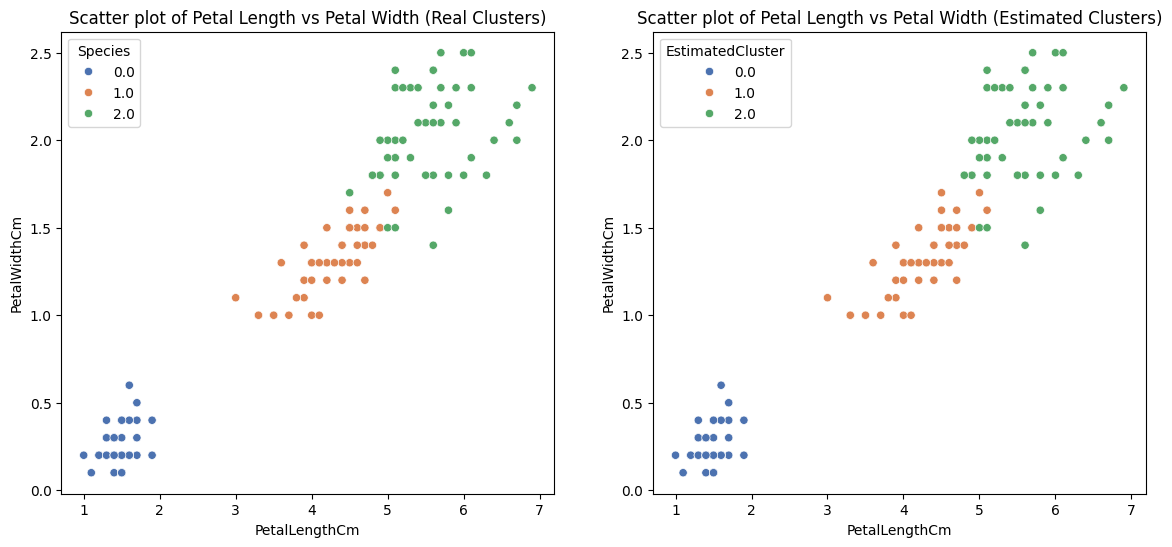

In [59]:

# Plot real clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=irisData, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='deep')
plt.title('Scatter plot of Petal Length vs Petal Width (Real Clusters)')

# Plot estimated clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=irisData, x='PetalLengthCm', y='PetalWidthCm', hue='EstimatedCluster', palette='deep')
plt.title('Scatter plot of Petal Length vs Petal Width (Estimated Clusters)')

plt.show()

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [60]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_values = range(1, 11)


# For each k
for k in k_values:
    # Do K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(irisData_clean)
    # Get the SSE for the current k
    sse.append(kmeans.inertia_)
    

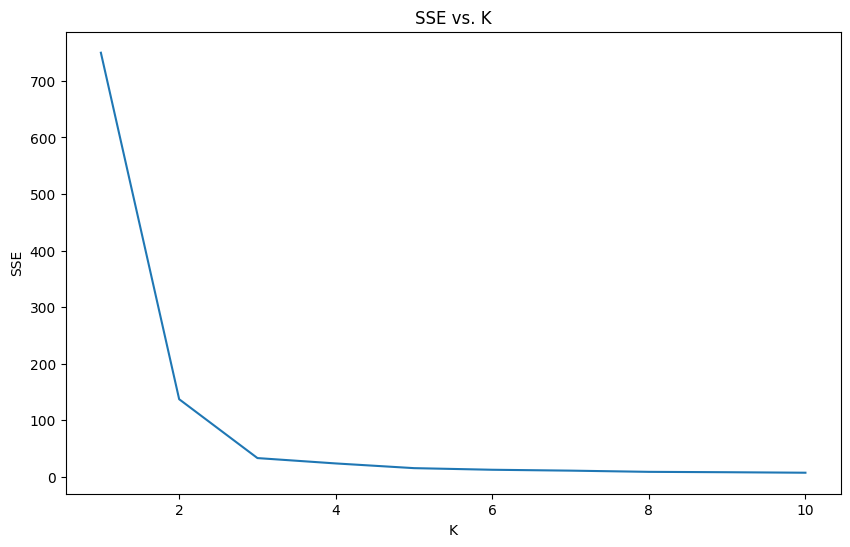

In [61]:
# Plot sse versus k
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=sse)
plt.title('SSE vs. K')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()


Choose the k after which the sse is minimally reduced


In [63]:
# Find the elbow point
optimal_k = 1




In [66]:
for i in range(1, len(sse)):
    if sse[i] - sse[i-1] < 0.1 * (sse[1] - sse[0]):
        optimal_k = i + 2
        break

In [67]:
print(f"The optimal value of k is: {optimal_k}")

The optimal value of k is: 3


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k